# Analysis - exp8

A wythoff stumbler-strategist hyper-parameter search. Tweaking the definition of Hot and Cold

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Find the files
path = "/Users/type/Code/azad/data/wythoff/exp8/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*")))
files[:10]

['/Users/type/Code/azad/data/wythoff/exp8/run_0.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_1.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_10.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_11.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_12.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_13.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_14.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_15.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_16.pkl',
 '/Users/type/Code/azad/data/wythoff/exp8/run_17.pkl']

In [3]:
model = th.load(files[0])

In [4]:
model.keys()

dict_keys(['episode', 'epsilon', 'anneal', 'gamma', 'num_episodes', 'num_stumbles', 'num_strategies', 'influence', 'stumbler_score', 'strategist_score', 'stumbler_game', 'strategist_game', 'cold_threshold', 'hot_threshold', 'learning_rate_stumbler', 'learning_rate_strategist', 'strategist_state_dict', 'stumbler_player_dict', 'stumbler_opponent_dict'])

In [7]:
table = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['hot_threshold'],
        model['cold_threshold'],
        model['strategist_score'],
        model['influence']
    )
    table.append(row)
    
pprint(table[:3])

[(0, 0.0, 0.0, 0.00020313262939453125, 1.0),
 (1, 0.11, 0.0, 0.00044345855712890625, 1.0),
 (10, 0.0, -0.11, 9.226799011230469e-05, 1.0)]


In [35]:
# Sort by score
def get_score(row):
    return row[-2]

table = sorted(table, key=get_score, reverse=False)
pprint(table[:20])

[(70, 0.0, -0.77, 1.4901161193847656e-05, 0.975),
 (55, 0.55, -0.55, 3.838539123535156e-05, 1.0),
 (40, 0.0, -0.44, 4.220008850097656e-05, 1.0),
 (57, 0.77, -0.55, 4.863739013671875e-05, 1.0),
 (45, 0.55, -0.44, 6.23464584350586e-05, 1.0),
 (42, 0.22, -0.44, 8.022785186767578e-05, 1.0),
 (80, 0.0, -0.88, 8.779764175415039e-05, 1.0),
 (10, 0.0, -0.11, 9.226799011230469e-05, 1.0),
 (71, 0.11, -0.77, 9.441375732421875e-05, 1.0),
 (15, 0.55, -0.11, 9.614229202270508e-05, 1.0),
 (5, 0.55, 0.0, 0.00013267993927001953, 1.0),
 (66, 0.66, -0.66, 0.00014990568161010742, 1.0),
 (27, 0.77, -0.22, 0.0001901388168334961, 1.0),
 (0, 0.0, 0.0, 0.00020313262939453125, 1.0),
 (87, 0.77, -0.88, 0.00021147727966308594, 1.0),
 (65, 0.55, -0.66, 0.00023943185806274414, 1.0),
 (18, 0.88, -0.11, 0.00027763843536376953, 0.975),
 (44, 0.44, -0.44, 0.00030538439750671387, 1.0),
 (16, 0.66, -0.11, 0.0003164708614349365, 1.0),
 (58, 0.88, -0.55, 0.00032770633697509766, 1.0)]


In [10]:
# Save the sorted results table
f_name = os.path.join(results_path, "exp8_ranked.csv")
head = (
    "row_code", 
    'hot_threshold',
    'cold_threshold',
    'strategist_score',
    'influence'
)

with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for row in table:
        writer.writerow(row)

# Plots

## Score distributions

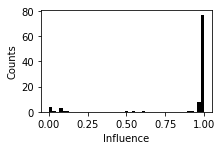

In [14]:
influence = [row[-1] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(influence, color='black', bins=45)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")

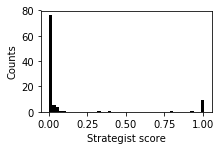

In [15]:
scores = [row[-2] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=45)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Strategist score")

## Strategist as a function of other parameters

In [17]:
hot_thresholds = [row[1] for row in table]

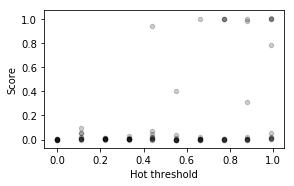

In [33]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(hot_thresholds, scores, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Hot threshold")
_ = plt.ylabel("Score")

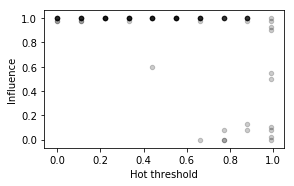

In [32]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(hot_thresholds, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Hot threshold")
_ = plt.ylabel("Influence")

In [21]:
cold_thresholds = [row[2] for row in table]

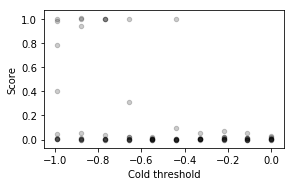

In [31]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(cold_thresholds, scores, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Cold threshold")
_ = plt.ylabel("Score")

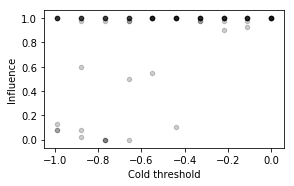

In [30]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(cold_thresholds, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Cold threshold")
_ = plt.ylabel("Influence")